<a href="https://colab.research.google.com/github/mequanent/Deep-Learning/blob/main/2_NNs_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Clone the repository first using the following command
!npx degit https://github.com/mequanent/Deep-Learning -f

npx: installed 1 in 2.735s
> destination directory is not empty. Using --force, continuing
> cloned mequanent/Deep-Learning#HEAD


# Libraries

In [5]:
import numpy as np
import pandas as pd
import random
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D#, Conv2DTranspose
from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

# 1.
(20%) Please construct a neural net (with its architecture shown below) and train it on ‘train.mat.” The activation function must be used in the two hidden layers and the output layer. You can construct and optimize your network model by using any off-the-shelf functions. Report the test error on the test set ‘test.mat’ (percentage of misclassified test samples).

# Read Dataset

In [5]:
train = loadmat(r"NNs from Scratch/train.mat")
test = loadmat(r"NNs from Scratch/test.mat")
df = pd.DataFrame()
df['x1'] = train['x1'].flatten()
df['x2'] = train['x2'].flatten()
df['y'] = train['y']

test_df = pd.DataFrame()
test_df['x1'] = test['x1'].flatten()
test_df['x2'] = test['x2'].flatten()
test_df['y'] = test['y']

In [6]:
model = keras.Sequential()
model.add(Dense(3, input_shape=(2,), activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(2, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(1, activation='sigmoid', use_bias=True, bias_initializer='zeros'))

model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

x = np.column_stack((df.x1.values, df.x2.values))
x_test = np.column_stack((test_df.x1.values, test_df.x2.values))

model.fit(x, df.y.values, batch_size=10, epochs=400)

Epoch 1/400
7/7 [==============================] - 3s 5ms/step - loss: 0.7791 - accuracy: 0.5000
Epoch 2/400
7/7 [==============================] - 0s 5ms/step - loss: 0.7647 - accuracy: 0.5000
Epoch 3/400
7/7 [==============================] - 0s 4ms/step - loss: 0.7526 - accuracy: 0.5000
Epoch 4/400
7/7 [==============================] - 0s 4ms/step - loss: 0.7402 - accuracy: 0.5000
Epoch 5/400
7/7 [==============================] - 0s 7ms/step - loss: 0.7290 - accuracy: 0.5000
Epoch 6/400
7/7 [==============================] - 0s 3ms/step - loss: 0.7194 - accuracy: 0.5000
Epoch 7/400
7/7 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.5000
Epoch 8/400
7/7 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 9/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 10/400
7/7 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5000
Epoch 11/400
7/7 [===========

In [7]:
evaluation = model.evaluate(x_test, test_df.y.values)
error_rate = 1 - evaluation[1]
print("Prediction error rate on test data: ", error_rate)

1/1 [==============================] - 0s 127ms/step - loss: 0.1647 - accuracy: 0.9667
Prediction error rate on test data:  0.03333336114883423


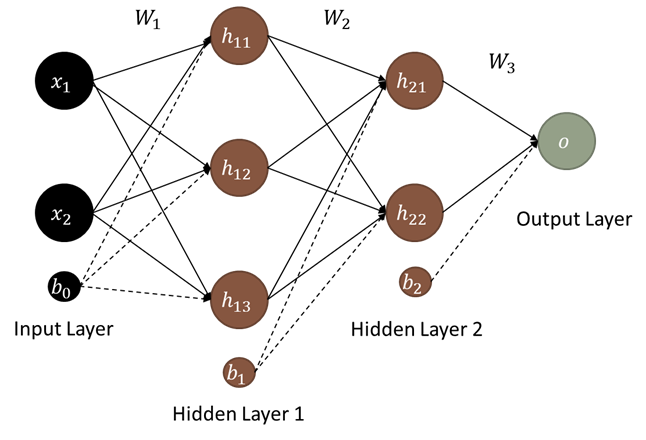

# 2

## 2.1
(20%) You are asked to construct a classification model based on multi-layer convolutional neural networks (at least five layers) for digit recognition. Please report the prediction accuracy for the test set. (Hint: its loss function could be cross entropy)

In [6]:
def preprocess():
  # load dataset
  (trainX, trainy), (testX, testy) = mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  trainX = trainX.astype('float') / 255
  testX = testX.astype('float') / 255

  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return trainX, testX, trainy, testy

xtrain, xtest, ytrain, ytest = preprocess()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
def build_cnn_model(x_train, y_train):
  input_shape = x_train.shape[1:]
  model = keras.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.summary()

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

  return model

In [8]:
model_2_1 = build_cnn_model(xtrain, ytrain)
evaluation = model_2_1.evaluate(xtest, ytest, verbose=0)
print("Test loss: ", evaluation[0])
print("Prediction error: ", 1 - evaluation[1])
print("Test accuracy: ", evaluation[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                        

## 2.2
(15%) Please randomly set 5%, 10%, and 15% of pixels to 255 for each image and evaluate the test set using the model you trained on clean images from 2.1. Report the prediction accuracies for the three different corruption rates. Compare your results with those in Question 2.1. What do you find?

In [9]:
def corrupt(data, corrupt_lv):
  #corrupt_lv = 0.05    #% using 5% and training data as an example
  img_size = 28*28
  corrupted = []
  for i in range(len(data)):
    ran_seq = random.sample([n for n in range(img_size)], int(img_size*corrupt_lv))
    x = data[i].reshape(-1, img_size)
    x[0, ran_seq] = 1 # 1 because already normalized by 255
    x = x.reshape((28, 28, 1))
    corrupted.append(x)
  return np.array(corrupted)

In [10]:
xtest_corrupted_5 = corrupt(xtest.copy(), 0.05)
xtest_corrupted_10 = corrupt(xtest.copy(), 0.1)
xtest_corrupted_15 = corrupt(xtest.copy(), 0.15)

In [ ]:
np.sum(xtest_corrupted_5 != xtest), np.sum(xtest_corrupted_10 != xtest), np.sum(xtest_corrupted_15 != xtest)

(387183, 774224, 1161433)

In [11]:
score_5 = model_2_1.evaluate(xtest_corrupted_5, ytest, verbose=0)
score_10 = model_2_1.evaluate(xtest_corrupted_10, ytest, verbose=0)
score_15 = model_2_1.evaluate(xtest_corrupted_15, ytest, verbose=0)

In [12]:
print("Accuracy with NO noise: ", evaluation[1])
print("Accuracy with 5% noise: ", score_5[1])
print("Accuracy with 10% noise: ", score_10[1])
print("Accuracy with 15% noise: ", score_15[1])

Accuracy with NO noise:  0.9927999973297119
Accuracy with 5% noise:  0.963100016117096
Accuracy with 10% noise:  0.8651000261306763
Accuracy with 15% noise:  0.6937000155448914


The accuracy before introducing any noise to the dataset is better than all others.
The prediction accuracy of the model trained with noise free dataset lowers down as the percentage of the noise introduced to the testing dataset increases.

## 2.3
(15%) Following Question 2.2, please re-train your model with the corrupted data (5%, 10%, and 15% separately) and re-evaluate the test set.
Report the prediction accuracies also for the three different corruption rates. Compare your results with those from 2.1 and 2.2. What do you find?


In [13]:
# get corrupted training data
xtrain_corrupted_5 = corrupt(xtrain.copy(), 0.05)
xtrain_corrupted_10 = corrupt(xtrain.copy(), 0.1)
xtrain_corrupted_15 = corrupt(xtrain.copy(), 0.15)

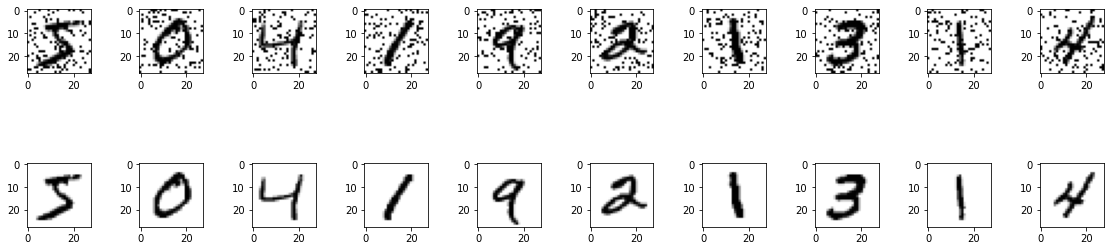

In [14]:
display_images(xtrain_corrupted_15, xtrain)

Train a CNN model with the same structure as in 2.1 by using the $5\%$ corrupted dataset and see the prediction accuracy for each percentage of corrupted data, including the original ($0\%$ corrupted data).

In [15]:
# model5 is a model trained with 5% corrupted training data
def get_model_x_accuracies(xtrain_corrupted_x, ytrain):
  model_x = build_cnn_model(xtrain_corrupted_x, ytrain)
  acc_x_0 = model_x.evaluate(xtest, ytest)
  acc_x_5 = model_x.evaluate(xtest_corrupted_5, ytest)
  acc_x_10 = model_x.evaluate(xtest_corrupted_10, ytest)
  acc_x_15 = model_x.evaluate(xtest_corrupted_15, ytest)

  return acc_x_0[1], acc_x_5[1], acc_x_10[1], acc_x_15[1]

In [16]:
acc_5_0, acc_5_5, acc_5_10, acc_5_15 = get_model_x_accuracies(xtrain_corrupted_5, ytrain)
acc_10_0, acc_10_5, acc_10_10, acc_10_15 = get_model_x_accuracies(xtrain_corrupted_10, ytrain)
acc_15_0, acc_15_5, acc_15_10, acc_15_15 = get_model_x_accuracies(xtrain_corrupted_15, ytrain)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                      

In [17]:
print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(round(acc_5_0*100, 4), round(acc_5_5*100, 4), round(acc_5_10*100, 4),
      round(acc_5_15*100, 4))

print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(round(acc_10_0*100, 4), round(acc_10_5*100, 4), round(acc_10_10*100, 4),
      round(acc_10_15*100, 4))

print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(round(acc_15_0*100, 4), round(acc_15_5*100, 4), round(acc_15_10*100, 4),
      round(acc_15_15*100, 4))

Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.
99.28 99.17 99.14 98.89
Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.
99.11 99.01 99.04 98.84
Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.
99.16 99.05 99.01 99.0


In [13]:
acc_5_0, acc_5_5, acc_5_10, acc_5_15 = get_model_x_accuracies(xtrain_corrupted_5, ytrain)
acc_10_0, acc_10_5, acc_10_10, acc_10_15 = get_model_x_accuracies(xtrain_corrupted_10, ytrain)
acc_15_0, acc_15_5, acc_15_10, acc_15_15 = get_model_x_accuracies(xtrain_corrupted_15, ytrain)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 64)        73792     
                                                                 
 conv2d_14 (Conv2D)          (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                      

In [18]:
print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(round(acc_5_0*100, 4), round(acc_5_5*100, 4), round(acc_5_10*100, 4),
      round(acc_5_15*100, 4))

print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(round(acc_10_0*100, 4), round(acc_10_5*100, 4), round(acc_10_10*100, 4),
      round(acc_10_15*100, 4))

print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(round(acc_15_0*100, 4), round(acc_15_5*100, 4), round(acc_15_10*100, 4),
      round(acc_15_15*100, 4))


Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.
99.23 99.15 99.0 98.76
Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.
99.2 99.24 99.16 99.1
Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.
99.16 99.18 99.07 99.03


In [ ]:
# build and test model based on the corrupted training and testing
def get_corrupted_model(x_train, y_train, x_test, y_test):
  batch_size = 128
  epochs = 10
  input_shape = x_train.shape[1:]
  model = build_cnn_model(x_train, y_train)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  evaluation = model.evaluate(x_test, y_test, verbose=0)
  #print("Test loss: ", evaluation[0])
  #print("Test accuracy: ", evaluation[1])
  return evaluation[1] # return accuracy of the model

In [ ]:
# model5 is a model trained with 5% corrupted training data
model5 = build_cnn_model(xtrain_corrupted_5, ytrain)
acc_5_0 = model5.evaluate(xtest, ytest)[1]
acc_5_5 = model5.evaluate(xtest_corrupted_5, ytest)[1]
acc_5_10 = model5.evaluate(xtest_corrupted_10, ytest)[1]
acc_5_15 = model5.evaluate(xtest_corrupted_15, ytest)[1]

In [ ]:
# model10 is a model trained with 10% corrupted training data
model5 = build_cnn_model(xtrain_corrupted_10, ytrain)
acc_10_0 = model10.evaluate(xtest, ytest)[1]
acc_10_5 = model10.evaluate(xtest_corrupted_5, ytest)[1]
acc_10_10 = model10.evaluate(xtest_corrupted_10, ytest)[1]
acc_10_15 = model10.evaluate(xtest_corrupted_15, ytest)[1]

In [ ]:
# model15 is a model trained with 10% corrupted training data
model15 = build_cnn_model(xtrain_corrupted_15, ytrain)
acc_15_0 = model15.evaluate(xtest, ytest)[1]
acc_15_5 = model15.evaluate(xtest_corrupted_5, ytest)[1]
acc_15_10 = model15.evaluate(xtest_corrupted_10, ytest)[1]
acc_15_15 = model15.evaluate(xtest_corrupted_15, ytest)[1]

In [ ]:
print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(acc_5_0[1], acc_5_5[1], acc_5_10[1], acc_5_15[1])

print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(acc_15_0[1], acc_15_5[1], acc_15_10[1], acc_15_15[1])

print('Prediction accuracy of the model trained with 0, 5, 10 and 15 % corrupted data, respectively.')
print(acc_10_0[1], acc_10_5[1], acc_10_10[1], acc_10_15[1])

In [ ]:
acc_5 = get_corrupted_model(xtrain_corrupted_5, ytrain, xtest_corrupted_5, ytest, verbose=0)
acc_10 = get_corrupted_model(xtrain_corrupted_10, ytrain, xtest_corrupted_10, ytest, verbose=0)
acc_15 = get_corrupted_model(xtrain_corrupted_15, ytrain, xtest_corrupted_15, ytest, verbose=0)

In [ ]:
print("Accuracy of the model trained with 5% corrupted data: ", acc_5)
print("Accuracy of the model trained with 5% corrupted data: ", acc_10)
print("Accuracy of the model trained with 5% corrupted data: ", acc_15)

Accuracy of the model trained with 5% corrupted data:  0.989799976348877
Accuracy of the model trained with 5% corrupted data:  0.9873999953269958
Accuracy of the model trained with 5% corrupted data:  0.9883000254631042


## 2.4
(15%) Following Question 2.2, please construct ONE restoration model (also convolutional neural networks) that inputs a corrupt image and outputs its restored image. (Hint: its loss function could be MAE or MSE)

References:
1. https://keras.io/examples/vision/autoencoder/
2. https://www.youtube.com/watch?v=Sm54KXD-L1k
3.
https://github.com/bnsreenu/python_for_microscopists/blob/master/086--auto_denoise_mnist.py

In [52]:
def display_images(image1, image2):
  plt.figure(figsize=(40, 4))
  i, indices = 0, np.random.randint(len(image1), size=10)
  for j in indices:
      # display first image
      ax = plt.subplot(3, 20, i + 1)
      plt.imshow(image1[j].reshape(28, 28), cmap="binary")

      # display second image
      ax = plt.subplot(3, 20, 40 +i+ 1)
      plt.imshow(image2[j].reshape(28, 28), cmap="binary")

      i += 1
  plt.show()

In [65]:
# Image restoration model trained with the 5% corrupted images
restoring_model = Sequential()
restoring_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(MaxPooling2D((2, 2), padding='same'))

restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(32, (3, 3), activation='relu'))
restoring_model.add(UpSampling2D((2, 2)))
restoring_model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

restoring_model.compile(optimizer='adam', loss='mean_squared_error')
restoring_model.summary()

restoring_model.fit(xtrain_corrupted_5, xtrain, epochs=200, batch_size=256, shuffle=True,
          validation_data=(xtest_corrupted_5, xtest))
restoring_model.evaluate(xtest_corrupted_5, xtest)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 4, 4, 8)        

0.009464209899306297

313/313 [==============================] - 1s 3ms/step


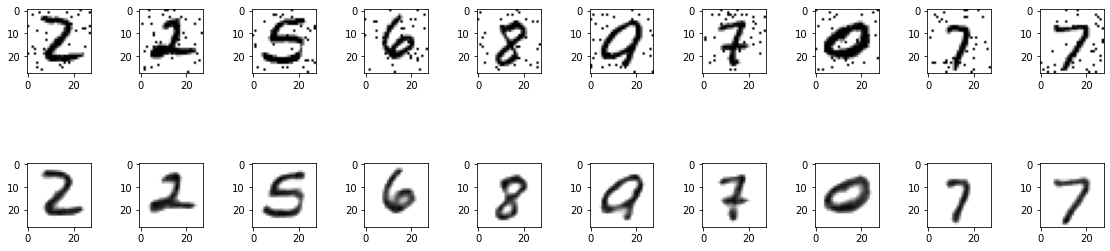

In [58]:
restored_5 = restoring_model.predict(xtest_corrupted_5)
display_images(xtest_corrupted_5, restored_5)

313/313 [==============================] - 1s 2ms/step


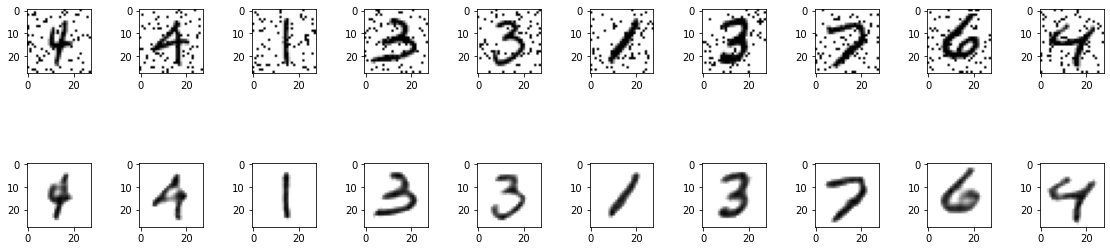

In [59]:
restored_10 = restoring_model.predict(xtest_corrupted_10)
display_images(xtest_corrupted_10, restored_10)

313/313 [==============================] - 1s 2ms/step


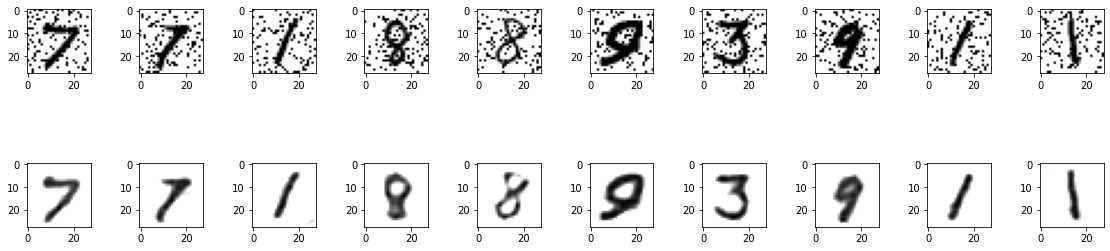

In [60]:
restored_15 = restoring_model.predict(xtest_corrupted_15)
display_images(xtest_corrupted_15, restored_15)

## 2.5
(15%) Following Question 2.4, please evaluate the restored test set using the model you trained on clean images in Question 2.1. Report the prediction accuracies for restored images separately at the three different corruption rates. What do you find?

In [62]:
evaluation_5 = model_2_1.evaluate(restored_5, ytest, verbose=0)
print("Test loss: ", evaluation_5[0])
print("Test accuracy: ", evaluation_5[1])

Test loss:  0.12296006083488464
Test accuracy:  0.9714999794960022


In [63]:
evaluation_10 = model_2_1.evaluate(restored_10, ytest, verbose=0)
print("Test loss: ", evaluation_10[0])
print("Test accuracy: ", evaluation_10[1])

Test loss:  0.12909750640392303
Test accuracy:  0.9710000157356262


In [64]:
evaluation_15 = model_2_1.evaluate(restored_15, ytest, verbose=0)
print("Test loss: ", evaluation_15[0])
print("Test accuracy: ", evaluation_15[1])

Test loss:  0.14269238710403442
Test accuracy:  0.9682000279426575
